In [1]:
from sklearn import __version__

__version__

'0.21.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.datasets import load_boston


warnings.filterwarnings('ignore')
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston.target

## Check assumptions of Linear Relationship

### 1. Normality of Residuals

In [6]:
xc = sm.add_constant(X)
lin_reg = sm.OLS(y,X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 08 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:49:55   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
xc = sm.add_constant(X)
lin_reg = sm.OLS(y,X.drop(columns=['INDUS','AGE'])).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:49:55   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3116.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0928      0.034     -2.702      0.007      -0.160      -0.025
ZN             0.0498      0.014      3.508      0.000       0.022       0.078
CHAS           2.8248      0.897      3.151      0.002       1.063       4.586
NOX           -3.3945      3.096     -1.097      0.273      -9.477       2.688
RM             5.8979      0.296     19.909      0.000       5.316       6.480
DIS           -0.9298      0.177     -5.262      0.000      -1.277      -0.583
RAD            0.1743      0.064      2.724      0.007       0.049       0.300
TAX           -0.0096      0.004     -2.710      0.007      -0.016      -0.003
PTRATIO       -0.3951      0.109     -3.631      0.000      -0.609      -0.181
B              0.0149      0.003      5.531      0.000       0.010       0.020
LSTAT         -0.4254      0.048     -8.917      0.000      -0.519      -0.332
==============================================================================
Omnibus:                      200.446   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.904
Skew:                           1.584   Prob(JB):                    4.89e-286
Kurtosis:                      10.230   Cond. No.                     7.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

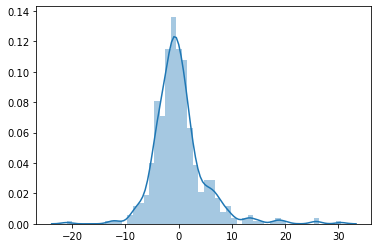

In [8]:
sns.distplot(lin_reg.resid)

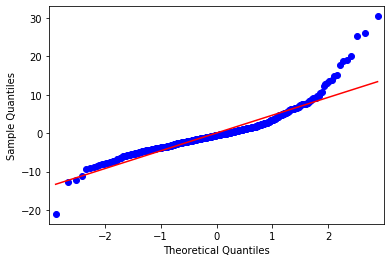

In [9]:
sm.qqplot(lin_reg.resid,line='r')
plt.show()

### 2. No Multi Collinearity

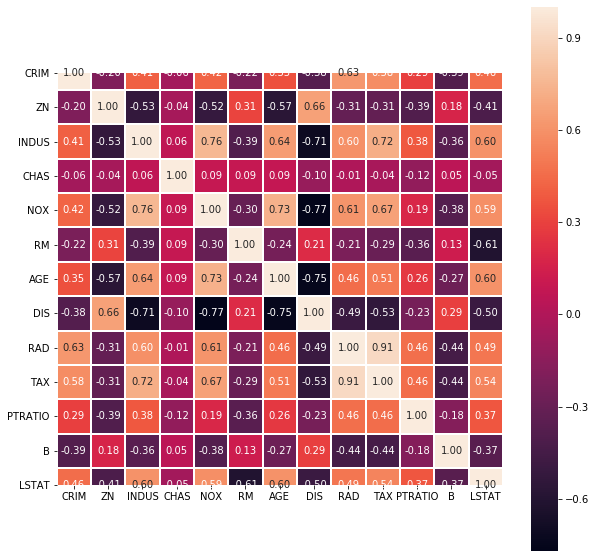

In [10]:
plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(X.corr(),fmt='.2f',annot=True,square=True,linewidth="1")
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values,i) for i,_ in enumerate(X)]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
CRIM,2.100373
ZN,2.844013
INDUS,14.485758
CHAS,1.152952
NOX,73.894947
RM,77.948283
AGE,21.386850
DIS,14.699652
RAD,15.167725
TAX,61.227274


### 3. No Hetroscedaticity

In [12]:
y_pred = lin_reg.predict()
resids = lin_reg.resid

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

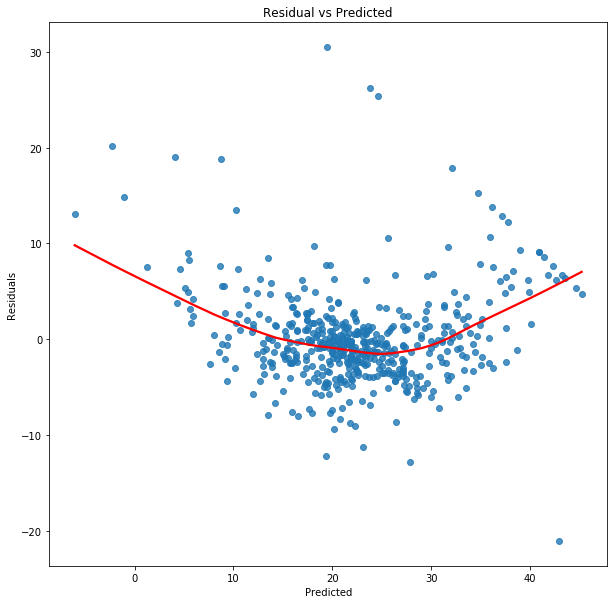

In [13]:
# lowess, locally weighted linear regression
ax = sns.regplot(y_pred,resids,lowess=True,line_kws={'color':'red'})
ax.set_title('Residual vs Predicted')
ax.set(xlabel='Predicted',ylabel='Residuals')

#### Testing for Homoscedasticity

H0: Homoscedaticity

H1: Hetroscedaticity

In [14]:
name = ['F-statistic','p-value']
test = sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

In [15]:
test

(3.049666704179622, 1.4047411919024912e-17, 'increasing')

Goldfeldquandt test for homoscedasticity. Since prob is much lower than alpha we reject than alpha we reject the null hypothesis and accept alternate hypothesis that residuals are heteroscedaticity.

### 4. Autocorrelation

**durbin watson test**

In [16]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lin_reg.resid)

1.0045250538725568

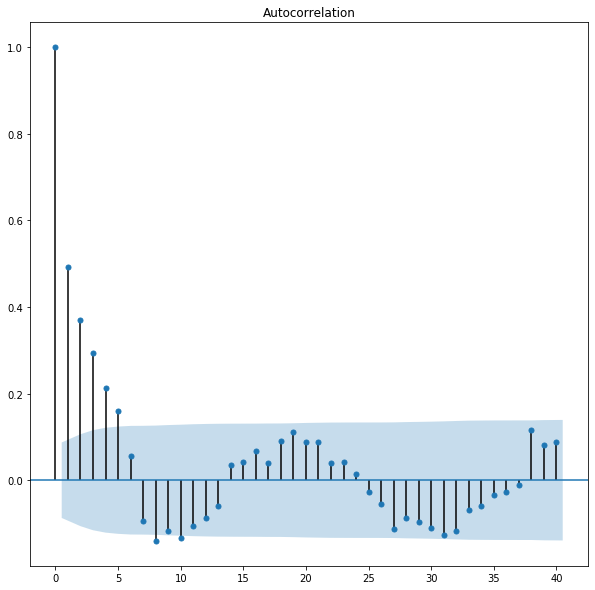

In [17]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,lags=40)
acf.show()

### 5. Linearity of the relationship

[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Observed')]

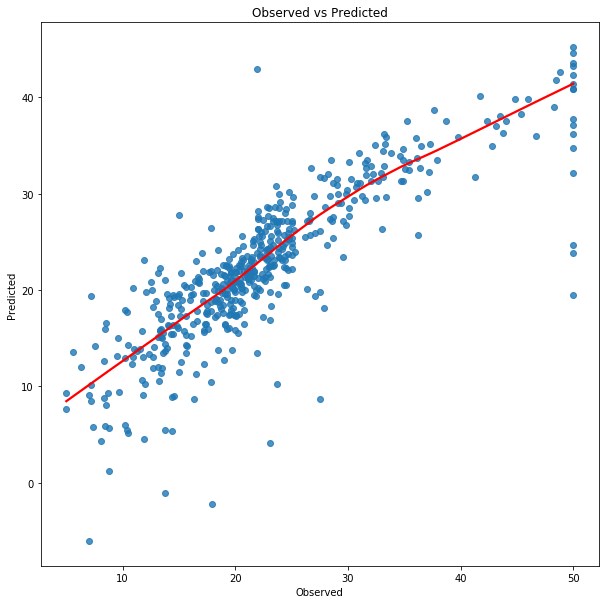

In [18]:
y_pred = lin_reg.predict()
ax = sns.regplot(y=y_pred,x=y,lowess=True,line_kws={'color':'red'})
ax.set_title('Observed vs Predicted')
ax.set(xlabel='Observed',ylabel='Predicted')

We will compare the pedicted output rather than the dependent variables to check for linearity of the relation.

In [19]:
from sklearn.metrics import r2_score

In [21]:
y_pred = lin_reg.predict()
r2_score(y,y_pred)

0.7135748213747763